# Introduction to DPLYR

# A.1 Working with data in R

### A.1.1 What is a Data Frame? 
- Think of it as an excel sheet with data
- In many cases:
    - Rows are observations (e.g. people, households, countries, time)
    - Columns are variables (e.g. GDP, life expectancy)
        
### A.1.2 Why don't we just use excel if Data Frames have similar structures?
- For many reasons:
    - We can easily copy dataframes and mainpulate
    - We have access to multiple dataframes with only one line of code

### A.1.3 What are the other advantages of using R and dataframes?
- We can be lazy and use the thousands of free libraries to easily:
    - Easily manipulate data (Today's topic)
    - Download data directly from the internet
    - Viusualize our data (graphing etc.)
    - Build models (Regression, Machine learning, Neural Networks)
    
    
- You have all used libraries before, perhaps without knowing it!
    - This is done in R in two steps: 
        1. install.packages("Package name") Downloads package
        2. library(Package name) Imports package

### A.1.4 What is the best way to manipulate Data Frames?
#### In R: DPLYR!
In python: Pandas

# 1. Basics

## 1.1 Find file [path](https://automatetheboringstuff.com/2e/chapter9/)

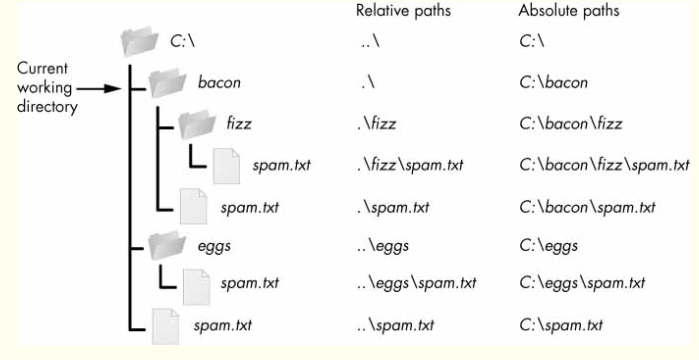

![title]("Images/File_path.png")

In [2]:
path = getwd() #Sets current working directory
print(paste("The current working directory is: ", getwd(), sep=""))

[1] "The current working directory is: /home/user/TA_session_DPLYR"


## 1.2 Import files
### 1.2.1 From: current working directory



#### 1.2.1.1 Lets import that file from an internal data set!

In [3]:
data("mtcars") #Download internal data set: cars data

write.csv(mtcars, "cars.csv") #Name the dataset "cars.csv" and save to current working directory

#### 1.2.1.2 Now import "cars.csv" which is now in our current directory

In [4]:
# read.csv("cars.csv")
df = read.csv("cars.csv") #We often name our dataframes df_NAME

### 1.2.2  From: not in our current directory

We need to know the file path of the file!!

#### 1.2.2.1 Create new directory (folder) and place new data set

In [5]:
dir.create('New_directory') #Creates new folder

setwd("New_directory") #Changes working directory

data("USArrests") #Imports internal data set

write.csv(USArrests, "arrests.csv") #Name the dataset "arrests.csv" and save to current working directory

setwd(path) #Returns to our original file path!!!

Warning message in dir.create("New_directory"):
“'New_directory' already exists”

In [6]:
getwd() #Checks our path which is not in the folder we just created

[1] "/home/user/TA_session_DPLYR"

#### 1.2.2.2 Import "arrests.csv" from the "New_directory" folder

In [7]:
df_arrests = read.csv("New_directory/arrests.csv")

In [8]:
head(df_arrests, 2)

,X,Murder,Assault,UrbanPop,Rape
,<fct>,<dbl>,<int>,<int>,<dbl>
1,Alabama,13.2,236,58,21.2
2,Alaska,10.0,263,48,44.5


# 2. DPLYR

We will use cars data set we named df

## 2.1 Basics

### 2.1.1 Download and import dplyr package

In [9]:
#install.packages("dplyr") #Already installed!
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### 2.1.2 Convert Data Frame into tibble (DPLYR's special Data Frame)

In [10]:
dp_df = as_tibble(df)

### 2.2 Select columns

In [11]:
#We can list all the column names from a Data Frame
colnames(dp_df)

[1] "X"    "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"  
[11] "gear" "carb"

### 2.2.1 Select one column

In [12]:
dp_df %>% #Dataframe
select(X)%>% #Select column named X
head(3) #Shows only first 3 obs

X
<fct>
Mazda RX4
Mazda RX4 Wag
Datsun 710


### 2.2.2 Select multiple columns

In [13]:
dp_df %>% #Dataframe
select(cyl, disp, hp, wt)%>% #Select column named X
head(2) #Shows only first 2 obs

cyl,disp,hp,wt
<int>,<dbl>,<int>,<dbl>
6,160,110,2.620
6,160,110,2.875


### 2.2.3 QUESTION: Select columns and create new Data Frame

### 2.2.4 Pull: similar to select expect it only extracts values

In [14]:
dp_df %>% #Dataframe
pull(var = cyl)

[1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4

## 2.3 Filter 

In [15]:
head(dp_df,2)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Mazda RX4,21,6,160,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4


### 2.3.1 Filter by 1 condition

In [16]:
dp_df %>% 
filter(mpg>22)%>% #filter all observations over 25 mpg
head(5)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


### 2.3.2 Filter by 2 conditions

In [17]:
dp_df %>% 
filter(mpg>22 & mpg<35) %>% head(5)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


### 2.3.3 Filter by gear not equal to 4

In [18]:
dp_df %>% 
filter(gear!=4)%>% head(2)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


### 2.3.4 QUESTION: Filter by vs=1

## 2.4 Arrange

### 2.4.1 Arrange by column (Ascending)

In [19]:
dp_df %>% 
arrange(mpg)%>% 
head(3)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Cadillac Fleetwood,10.4,8,472,205,2.93,5.250,17.98,0,0,3,4
Lincoln Continental,10.4,8,460,215,3.00,5.424,17.82,0,0,3,4
Camaro Z28,13.3,8,350,245,3.73,3.840,15.41,0,0,3,4


### 2.4.2 Arrange  (Descending)

In [20]:
dp_df %>% 
arrange(desc(mpg))%>% 
head(3)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


## 2.5 Mutate (Create new column)

### 2.5.1 Mutate

In [21]:
dp_df %>% 
mutate(mpg_10 = mpg/10) %>% head(2)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_10
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
Mazda RX4,21,6,160,110,3.9,2.620,16.46,0,1,4,4,2.1
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4,2.1


#### 2.5.1.1 Mutate: Various functions
1. Cumulative sum: cumsum(X)
2. Lag: lag(X)
3. percent_rank(X)

In [53]:
dp_df %>% 
mutate(cumulative_wt = cumsum(wt), #cumulative
       lag_wt = lag(wt), #Opposite function: lead()
       Percent_wt = percent_rank(wt)
      ) %>% head(2)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cumulative_wt,lag_wt,Percent_wt
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Mazda RX4,21,6,160,110,3.9,2.620,16.46,0,1,4,4,2.620,NA,0.2580645
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4,5.495,2.62,0.3548387


### 2.5.2 Transmute
- Same as mutate expect it drops other columns

In [22]:
dp_df %>% 
transmute(mpg_10 = mpg/10)%>% head(2)

mpg_10
<dbl>
2.1
2.1


### 2.5.3 Mutate_all

- Mutate all selected columns by certain function
- This example shows log
    - funs(log(.))

In [34]:
dp_df[, 2:5]%>% 
mutate_all(funs(log(.)))%>%
head(3)

mpg,cyl,disp,hp
<dbl>,<dbl>,<dbl>,<dbl>
3.044522,1.791759,5.075174,4.700480
3.044522,1.791759,5.075174,4.700480
3.126761,1.386294,4.682131,4.532599


### 2.5.4 Mutate_at

Mutates only at specified columns

In [36]:
dp_df%>% 
mutate_at(vars(mpg, disp, hp), funs(log(.)))%>% 
head(2)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Mazda RX4,3.044522,6,5.075174,4.70048,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,3.044522,6,5.075174,4.70048,3.9,2.875,17.02,0,1,4,4


## 2.6 Summarise

In [60]:
dp_df %>% 
summarise(mean_mpg = mean(mpg),
        median_mpg = median(mpg),
         sum_mpg = sum(mpg),
         count_mpg = n(),
         first_obs = first(mpg),
         last_obs = last(mpg),
         variance = var(mpg),
         sd = sd(mpg))

mean_mpg,median_mpg,sum_mpg,count_mpg,first_obs,last_obs,variance,sd
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
20.09062,19.2,642.9,32,21,21.4,36.3241,6.026948


## 2.7 Groupby with summarise

In [23]:
dp_df %>% 
group_by(gear) %>% 
summarise(mpg_by_gear = mean(mpg))

gear,mpg_by_gear
<int>,<dbl>
3,16.10667
4,24.53333
5,21.38000


# 3. Other import DPLYR functions

## 3.1 Count

### 3.1.1 Count number of observations by gear

In [24]:
dp_df %>% 
count(gear)

gear,n
<int>,<int>
3,15
4,12
5,5


## 3.2 Distinct

In [25]:
dp_df %>% 
distinct(X)%>% head(3)

X
<fct>
Mazda RX4
Mazda RX4 Wag
Datsun 710


## 3.3 Sample data

Used for train and test split in ML and NN

### 3.3.1 Sample 50% of the data

In [36]:
dp_df %>% 
sample_frac(.5)%>% head(3)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Merc 280,19.2,6,167.6,123,3.92,3.440,18.3,1,0,4,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.0,1,0,4,2
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.3,0,0,3,2


### 3.3.2 Sample 10 observations

In [37]:
dp_df %>% 
sample_n(10)%>% head(3)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Merc 280,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
Dodge Challenger,15.5,8,318.0,150,2.76,3.52,16.87,0,0,3,2
Porsche 914-2,26.0,4,120.3,91,4.43,2.14,16.70,0,1,5,2


## 3.4 Slice
Pick out rows by observation number

In [40]:
dp_df %>% 
slice(10:12)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4
Merc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,0,4,4
Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.4,0,0,3,3


## 3.5 add_count

In [40]:
dp_df %>% 
add_count()%>% 
head(3)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,n
<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,32
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,32
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,32
